# content
- [web scraping](#web_scraping)
- [data cleaning](#data_cleaning)
- [data analysis](#data_analysis)
- [conclusions](#conclusions)

In [1]:
# importing libraries
from bs4 import BeautifulSoup
import requests
import datetime
import csv
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import re as re
import os
import psycopg2 as ps
import sqlite3

## project scenario
- we are a startup starting a business in the kitchen appliances industry, we need to know **our main competitors** , **the most succeful products in each category** , and the **characteristics and pricing of the most succefull products.**
- the company is willing to produce products in 7 main categories: air fryers, food processors, espresso machines, blenders, mixers, toasters, and electric kettles.
- in order to answer the above questions we will scrape amazon data about the products with +4 stars rating in each of these catogeries and analyze their data to give a reliable answer to each one of them.

# web_scraping

In this part I create the main file which we will use in the data cleaning and analysis, we scrape each category by providing its link and scrape its products' details using the append_product function. <br>
I commented the lines that will create a new file just for myself so that the file doesn't get deleted.

In [ ]:
'''
main_page='https://www.amazon.eg/s?i=home&bbn=21863949031&rh=n%3A18021933031%2Cn%3A21863792031%2Cn%3A21863827031%2Cn%3A21863949031%2Cn%3A26957429031%2Cp_72%3A21909187031&dc&fs=true&language=en&ds=v1%3AAU%2FON3FdtLe4umfE6xf%2FVGlQf3BC%2B4wHfqH7eQw3qI0&qid=1673216837&rnid=21863949031&ref=sr_nr_n_1'
mains=[main_page]
filename='amazonKitchenFullData.csv'
'''

In [ ]:
'''
# creating the file and its headers
header=['title','brand','category','price','date','rating', 'num_of_ratings','link']

with open(filename,'w',newline='',encoding='UTF8') as f:
    writer=csv.writer(f)
    writer.writerow(header)
'''

In [ ]:
links=[]
titles=[]
def append_links(url):
    '''
    this function takes the page link as argument and returns all the products links in that page. 
    '''
    headers= {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.74 Safari/537.36"}
    page=requests.get(url,headers=headers,cookies={'lc-acbeg':'en_AE'},timeout=30,verify=False)
    soup1= BeautifulSoup(page.content,'html.parser')
    soup2=BeautifulSoup(soup1.prettify(),'html.parser')
    for link in soup2.find_all('a',attrs={"class": "a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"}):
        links.append('https://www.amazon.eg'+link.get('href'))
    for title in soup2.find_all('span',attrs={"class": "a-size-medium a-color-base a-text-normal"}):
        titles.append(title.get_text().strip())

In [ ]:
for x in range(0,4): # the range is the number of pages
    headers= {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.74 Safari/537.36"}
    page=requests.get(main_page,headers=headers,cookies={'lc-acbeg':'en_AE'},timeout=30,verify=False)
    soup1= BeautifulSoup(page.content,'html.parser')
    soup2=BeautifulSoup(soup1.prettify(),'html.parser')
    try:
        main2=soup2.find('a',attrs={"class": "s-pagination-item s-pagination-next s-pagination-button s-pagination-separator"}).get('href')
    except:
        main2=main_page
    if main2 in mains:
        append_links(main_page)
        break
    else:
        mains.append('https://www.amazon.eg'+main2)
    append_links(main_page)
    main_page='https://www.amazon.eg'+main2

In [ ]:
# checking the length and the links
print(len(mains))
print(mains[-5:])

In [ ]:
print(titles[-5:])
print(len(titles))
print(links[-5:])
print(len(links))

In [ ]:
missingLinks=[]
def appendProduct(link):
    '''
    this function takes the product link as an argument and returns the title, the price, category, rating, number of ratings, date and the link of the product.
    '''
    headers= {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.74 Safari/537.36"}
    page=requests.get(link,headers=headers,cookies={'lc-acbeg':'en_AE'},timeout=30,verify=False)
    soup1= BeautifulSoup(page.content,'html.parser')
    soup2=BeautifulSoup(soup1.prettify(),'html.parser')
    title=titles[i]
    try:
        brand=soup2.find("a", {"id": "bylineInfo"}).get_text().strip()
    except AttributeError:
        try:
            link=links[i]
            page = requests.get(link,headers=headers,verify=False, timeout=30)
            soup1 = BeautifulSoup(page.content,'html.parser')
            soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
            brand=soup2.find("a", {"id": "bylineInfo"}).get_text().strip()
        except AttributeError:
            try:
                link=links[i]
                page = requests.get(link,headers=headers,verify=False, timeout=30)
                soup1 = BeautifulSoup(page.content,'html.parser')
                soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
                brand=soup2.find("a", {"id": "bylineInfo"}).get_text().strip()
            except AttributeError:
                brand='N/A'
    try:
        price=soup2.find("span", {"class": "a-price-whole"}).get_text().strip()
    except AttributeError:
        try:
            link=links[i]
            page = requests.get(link,headers=headers,verify=False, timeout=30)
            soup1 = BeautifulSoup(page.content,'html.parser')
            soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
            price=soup2.find("span", {"class": "a-price-whole"}).get_text().strip()
        except AttributeError:
            try:
                link=links[i]
                page = requests.get(link,headers=headers,verify=False, timeout=30)
                soup1 = BeautifulSoup(page.content,'html.parser')
                soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
                price=soup2.find("span", {"class": "a-price-whole"}).get_text().strip()
            except AttributeError:
                price='N/A'
    try:
        num_of_ratings=soup2.find("span", {"id": "acrCustomerReviewText"}).get_text().strip()
    except AttributeError:
        try:
            link=links[i]
            page = requests.get(link,headers=headers,verify=False, timeout=30)
            soup1 = BeautifulSoup(page.content,'html.parser')
            soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
            num_of_ratings=soup2.find("span", {"id": "acrCustomerReviewText"}).get_text().strip()
        except AttributeError:
            try:
                link=links[i]
                page = requests.get(link,headers=headers,verify=False, timeout=30)
                soup1 = BeautifulSoup(page.content,'html.parser')
                soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
                num_of_ratings=soup2.find("span", {"id": "acrCustomerReviewText"}).get_text().strip()
            except AttributeError:
                num_of_ratings='N/A'

    today=datetime.date.today()
    try:
        rating=soup2.find("span", {"class": "a-icon-alt"}).get_text().strip()
        if rating=='Previous page':
            rating='N/A'
        else:
            rating=rating
    except AttributeError:
            try:
                link=links[i]
                page = requests.get(link,headers=headers,verify=False, timeout=30)
                soup1 = BeautifulSoup(page.content,'html.parser')
                soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
                rating=soup2.find("span", {"class": "a-icon-alt"}).get_text().strip()
                if rating=='Previous page':
                    rating='N/A'
                else:
                    rating=rating
            except AttributeError:
                rating='N/A'
    if rating == 'N/A' and price == 'N/A':
        missingLinks.append(links[i])
    link=links[i]
    category='air fryers'
    data=[title,brand,category,price,today,rating, num_of_ratings,link]
    with open(filename,'a+',newline='',encoding='UTF8') as f:
        writer=csv.writer(f)
        writer.writerow(data)


In [ ]:
# loop over products
i=0
for link in links:
    appendProduct(links[i])
    i+=1

In [ ]:
print(i)

we start repeating the process for each category until we're done

In [ ]:
main_page='https://www.amazon.eg/s?i=home&bbn=21863955031&rh=n%3A18021933031%2Cn%3A21863792031%2Cn%3A21863827031%2Cn%3A21863955031%2Cn%3A21864402031%2Cp_72%3A21909187031&dc&fs=true&language=en&ds=v1%3AaEqB9e39uL4q4gv8EZmR7Pzm9d8qJI8AIhkoKcbetaM&qid=1673219711&rnid=21863955031&ref=sr_nr_n_2'
mains=[main_page]

In [ ]:
links=[]
titles=[]
for x in range(0,5): # the range is the number of pages
    headers= {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.74 Safari/537.36"}
    page=requests.get(main_page,headers=headers,cookies={'lc-acbeg':'en_AE'},timeout=30,verify=False)
    soup1= BeautifulSoup(page.content,'html.parser')
    soup2=BeautifulSoup(soup1.prettify(),'html.parser')
    try:
        main2=soup2.find('a',attrs={"class": "s-pagination-item s-pagination-next s-pagination-button s-pagination-separator"}).get('href')
    except:
        main2=main_page
    if main2 in mains:
        append_links(main_page)
        break
    else:
        mains.append('https://www.amazon.eg'+main2)
    append_links(main_page)
    main_page='https://www.amazon.eg'+main2

In [ ]:
print(len(mains))
print(mains[-5:])
print(titles[-5:])
print(len(titles))
print(links[-5:])
print(len(links))

In [ ]:
missingLinks=[]
def appendProduct(link):
    '''
    this function takes the product link as an argument and returns the title, the price, category, rating, number of ratings, date and the link of the product.
    '''
    headers= {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.74 Safari/537.36"}
    page=requests.get(link,headers=headers,cookies={'lc-acbeg':'en_AE'},timeout=30,verify=False)
    soup1= BeautifulSoup(page.content,'html.parser')
    soup2=BeautifulSoup(soup1.prettify(),'html.parser')
    title=titles[i]
    try:
        brand=soup2.find("a", {"id": "bylineInfo"}).get_text().strip()
    except AttributeError:
        try:
            link=links[i]
            page = requests.get(link,headers=headers,verify=False, timeout=30)
            soup1 = BeautifulSoup(page.content,'html.parser')
            soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
            brand=soup2.find("a", {"id": "bylineInfo"}).get_text().strip()
        except AttributeError:
            try:
                link=links[i]
                page = requests.get(link,headers=headers,verify=False, timeout=30)
                soup1 = BeautifulSoup(page.content,'html.parser')
                soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
                brand=soup2.find("a", {"id": "bylineInfo"}).get_text().strip()
            except AttributeError:
                brand='N/A'
    try:
        price=soup2.find("span", {"class": "a-price-whole"}).get_text().strip()
    except AttributeError:
        try:
            link=links[i]
            page = requests.get(link,headers=headers,verify=False, timeout=30)
            soup1 = BeautifulSoup(page.content,'html.parser')
            soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
            price=soup2.find("span", {"class": "a-price-whole"}).get_text().strip()
        except AttributeError:
            try:
                link=links[i]
                page = requests.get(link,headers=headers,verify=False, timeout=30)
                soup1 = BeautifulSoup(page.content,'html.parser')
                soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
                price=soup2.find("span", {"class": "a-price-whole"}).get_text().strip()
            except AttributeError:
                price='N/A'
    try:
        num_of_ratings=soup2.find("span", {"id": "acrCustomerReviewText"}).get_text().strip()
    except AttributeError:
        try:
            link=links[i]
            page = requests.get(link,headers=headers,verify=False, timeout=30)
            soup1 = BeautifulSoup(page.content,'html.parser')
            soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
            num_of_ratings=soup2.find("span", {"id": "acrCustomerReviewText"}).get_text().strip()
        except AttributeError:
            try:
                link=links[i]
                page = requests.get(link,headers=headers,verify=False, timeout=30)
                soup1 = BeautifulSoup(page.content,'html.parser')
                soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
                num_of_ratings=soup2.find("span", {"id": "acrCustomerReviewText"}).get_text().strip()
            except AttributeError:
                num_of_ratings='N/A'

    today=datetime.date.today()
    try:
        rating=soup2.find("span", {"class": "a-icon-alt"}).get_text().strip()
        if rating=='Previous page':
            rating='N/A'
        else:
            rating=rating
    except AttributeError:
            try:
                link=links[i]
                page = requests.get(link,headers=headers,verify=False, timeout=30)
                soup1 = BeautifulSoup(page.content,'html.parser')
                soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
                rating=soup2.find("span", {"class": "a-icon-alt"}).get_text().strip()
                if rating=='Previous page':
                    rating='N/A'
                else:
                    rating=rating
            except AttributeError:
                rating='N/A'
    if rating == 'N/A' and price == 'N/A':
        missingLinks.append(links[i])
    link=links[i]
    category='food processors'
    data=[title,brand,category,price,today,rating, num_of_ratings,link]
    with open(filename,'a+',newline='',encoding='UTF8') as f:
        writer=csv.writer(f)
        writer.writerow(data)


In [ ]:
# loop over products
i=0
for link in links:
    appendProduct(links[i])
    i+=1

In [ ]:
print(i)

In [ ]:
main_page='https://www.amazon.eg/s?i=home&bbn=21864088031&rh=n%3A18021933031%2Cn%3A21863792031%2Cn%3A21863827031%2Cn%3A21864088031%2Cn%3A21864618031%2Cp_72%3A21909187031&dc&fs=true&language=en&ds=v1%3ATjaYlZt6%2BQiKZCN9dV8Uiwl84heZskiWDf54xFFmw6E&qid=1673220410&rnid=21864088031&ref=sr_nr_n_2'
mains=[main_page]

In [ ]:

links=[]
titles=[]
for x in range(0,4): # the range is the number of pages
    headers= {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.74 Safari/537.36"}
    page=requests.get(main_page,headers=headers,cookies={'lc-acbeg':'en_AE'},timeout=30,verify=False)
    soup1= BeautifulSoup(page.content,'html.parser')
    soup2=BeautifulSoup(soup1.prettify(),'html.parser')
    try:
        main2=soup2.find('a',attrs={"class": "s-pagination-item s-pagination-next s-pagination-button s-pagination-separator"}).get('href')
    except:
        main2=main_page
    if main2 in mains:
        append_links(main_page)
        break
    else:
        mains.append('https://www.amazon.eg'+main2)
    append_links(main_page)
    main_page='https://www.amazon.eg'+main2


In [ ]:
print(len(mains))
print(mains[-5:])
print(titles[-5:])
print(len(titles))
print(links[-5:])
print(len(links))

In [ ]:
missingLinks=[]
def appendProduct(link):
    '''
    this function takes the product link as an argument and returns the title, the price, category, rating, number of ratings, date and the link of the product.
    '''
    headers= {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.74 Safari/537.36"}
    page=requests.get(link,headers=headers,cookies={'lc-acbeg':'en_AE'},timeout=30,verify=False)
    soup1= BeautifulSoup(page.content,'html.parser')
    soup2=BeautifulSoup(soup1.prettify(),'html.parser')
    title=titles[i]
    try:
        brand=soup2.find("a", {"id": "bylineInfo"}).get_text().strip()
    except AttributeError:
        try:
            link=links[i]
            page = requests.get(link,headers=headers,verify=False, timeout=30)
            soup1 = BeautifulSoup(page.content,'html.parser')
            soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
            brand=soup2.find("a", {"id": "bylineInfo"}).get_text().strip()
        except AttributeError:
            try:
                link=links[i]
                page = requests.get(link,headers=headers,verify=False, timeout=30)
                soup1 = BeautifulSoup(page.content,'html.parser')
                soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
                brand=soup2.find("a", {"id": "bylineInfo"}).get_text().strip()
            except AttributeError:
                brand='N/A'
    try:
        price=soup2.find("span", {"class": "a-price-whole"}).get_text().strip()
    except AttributeError:
        try:
            link=links[i]
            page = requests.get(link,headers=headers,verify=False, timeout=30)
            soup1 = BeautifulSoup(page.content,'html.parser')
            soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
            price=soup2.find("span", {"class": "a-price-whole"}).get_text().strip()
        except AttributeError:
            try:
                link=links[i]
                page = requests.get(link,headers=headers,verify=False, timeout=30)
                soup1 = BeautifulSoup(page.content,'html.parser')
                soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
                price=soup2.find("span", {"class": "a-price-whole"}).get_text().strip()
            except AttributeError:
                price='N/A'
    try:
        num_of_ratings=soup2.find("span", {"id": "acrCustomerReviewText"}).get_text().strip()
    except AttributeError:
        try:
            link=links[i]
            page = requests.get(link,headers=headers,verify=False, timeout=30)
            soup1 = BeautifulSoup(page.content,'html.parser')
            soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
            num_of_ratings=soup2.find("span", {"id": "acrCustomerReviewText"}).get_text().strip()
        except AttributeError:
            try:
                link=links[i]
                page = requests.get(link,headers=headers,verify=False, timeout=30)
                soup1 = BeautifulSoup(page.content,'html.parser')
                soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
                num_of_ratings=soup2.find("span", {"id": "acrCustomerReviewText"}).get_text().strip()
            except AttributeError:
                num_of_ratings='N/A'

    today=datetime.date.today()
    try:
        rating=soup2.find("span", {"class": "a-icon-alt"}).get_text().strip()
        if rating=='Previous page':
            rating='N/A'
        else:
            rating=rating
    except AttributeError:
            try:
                link=links[i]
                page = requests.get(link,headers=headers,verify=False, timeout=30)
                soup1 = BeautifulSoup(page.content,'html.parser')
                soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
                rating=soup2.find("span", {"class": "a-icon-alt"}).get_text().strip()
                if rating=='Previous page':
                    rating='N/A'
                else:
                    rating=rating
            except AttributeError:
                rating='N/A'
    if rating == 'N/A' and price == 'N/A':
        missingLinks.append(links[i])
    link=links[i]
    category='espresso machines'
    data=[title,brand,category,price,today,rating, num_of_ratings,link]
    with open(filename,'a+',newline='',encoding='UTF8') as f:
        writer=csv.writer(f)
        writer.writerow(data)


In [ ]:
# loop over products
i=0
for link in links:
    appendProduct(links[i])
    i+=1

In [ ]:
print(i)

In [ ]:
main_page='https://www.amazon.eg/s?i=home&bbn=21864401031&rh=n%3A18021933031%2Cn%3A21863792031%2Cn%3A21863827031%2Cn%3A21863955031%2Cn%3A21864401031%2Cp_72%3A21909187031&dc&fs=true&language=en&ds=v1%3AJY%2BuJtvPkJ4eeU3gvw9f3%2B9urALxpLDUzdaJI9hn0nc&qid=1673220767&ref=sr_ex_n_1'
mains=[main_page]

In [ ]:
links=[]
titles=[]
for x in range(0,13): # the range is the number of pages
    headers= {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.74 Safari/537.36"}
    page=requests.get(main_page,headers=headers,cookies={'lc-acbeg':'en_AE'},timeout=30,verify=False)
    soup1= BeautifulSoup(page.content,'html.parser')
    soup2=BeautifulSoup(soup1.prettify(),'html.parser')
    try:
        main2=soup2.find('a',attrs={"class": "s-pagination-item s-pagination-next s-pagination-button s-pagination-separator"}).get('href')
    except:
        main2=main_page
    if main2 in mains:
        append_links(main_page)
        break
    else:
        mains.append('https://www.amazon.eg'+main2)
    append_links(main_page)
    main_page='https://www.amazon.eg'+main2


In [ ]:
print(len(mains))
print(mains[-5:])
print(titles[-5:])
print(len(titles))
print(links[-5:])
print(len(links))

In [ ]:
missingLinks=[]
def appendProduct(link):
    '''
    this function takes the product link as an argument and returns the title, the price, category, rating, number of ratings, date and the link of the product.
    '''
    headers= {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.74 Safari/537.36"}
    page=requests.get(link,headers=headers,cookies={'lc-acbeg':'en_AE'},timeout=30,verify=False)
    soup1= BeautifulSoup(page.content,'html.parser')
    soup2=BeautifulSoup(soup1.prettify(),'html.parser')
    title=titles[i]
    try:
        brand=soup2.find("a", {"id": "bylineInfo"}).get_text().strip()
    except AttributeError:
        try:
            link=links[i]
            page = requests.get(link,headers=headers,verify=False, timeout=30)
            soup1 = BeautifulSoup(page.content,'html.parser')
            soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
            brand=soup2.find("a", {"id": "bylineInfo"}).get_text().strip()
        except AttributeError:
            try:
                link=links[i]
                page = requests.get(link,headers=headers,verify=False, timeout=30)
                soup1 = BeautifulSoup(page.content,'html.parser')
                soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
                brand=soup2.find("a", {"id": "bylineInfo"}).get_text().strip()
            except AttributeError:
                brand='N/A'
    try:
        price=soup2.find("span", {"class": "a-price-whole"}).get_text().strip()
    except AttributeError:
        try:
            link=links[i]
            page = requests.get(link,headers=headers,verify=False, timeout=30)
            soup1 = BeautifulSoup(page.content,'html.parser')
            soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
            price=soup2.find("span", {"class": "a-price-whole"}).get_text().strip()
        except AttributeError:
            try:
                link=links[i]
                page = requests.get(link,headers=headers,verify=False, timeout=30)
                soup1 = BeautifulSoup(page.content,'html.parser')
                soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
                price=soup2.find("span", {"class": "a-price-whole"}).get_text().strip()
            except AttributeError:
                price='N/A'
    try:
        num_of_ratings=soup2.find("span", {"id": "acrCustomerReviewText"}).get_text().strip()
    except AttributeError:
        try:
            link=links[i]
            page = requests.get(link,headers=headers,verify=False, timeout=30)
            soup1 = BeautifulSoup(page.content,'html.parser')
            soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
            num_of_ratings=soup2.find("span", {"id": "acrCustomerReviewText"}).get_text().strip()
        except AttributeError:
            try:
                link=links[i]
                page = requests.get(link,headers=headers,verify=False, timeout=30)
                soup1 = BeautifulSoup(page.content,'html.parser')
                soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
                num_of_ratings=soup2.find("span", {"id": "acrCustomerReviewText"}).get_text().strip()
            except AttributeError:
                num_of_ratings='N/A'

    today=datetime.date.today()
    try:
        rating=soup2.find("span", {"class": "a-icon-alt"}).get_text().strip()
        if rating=='Previous page':
            rating='N/A'
        else:
            rating=rating
    except AttributeError:
            try:
                link=links[i]
                page = requests.get(link,headers=headers,verify=False, timeout=30)
                soup1 = BeautifulSoup(page.content,'html.parser')
                soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
                rating=soup2.find("span", {"class": "a-icon-alt"}).get_text().strip()
                if rating=='Previous page':
                    rating='N/A'
                else:
                    rating=rating
            except AttributeError:
                rating='N/A'
    if rating == 'N/A' and price == 'N/A':
        missingLinks.append(links[i])
    link=links[i]
    category='blenders'
    data=[title,brand,category,price,today,rating, num_of_ratings,link]
    with open(filename,'a+',newline='',encoding='UTF8') as f:
        writer=csv.writer(f)
        writer.writerow(data)


In [ ]:
# loop over products
i=0
for link in links:
    appendProduct(links[i])
    i+=1

In [ ]:
print(i)

In [ ]:
main_page='https://www.amazon.eg/-/en/s?i=home&bbn=21863955031&rh=n%3A18021933031%2Cn%3A21863792031%2Cn%3A21863827031%2Cn%3A21863955031%2Cn%3A21864400031%2Cp_72%3A21909187031&dc&fs=true&language=en&qid=1673223137&rnid=21863955031&ref=sr_pg_1'
mains=[main_page]

In [ ]:

links=[]
titles=[]
for x in range(0,8): # the range is the number of pages
    headers= {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.74 Safari/537.36"}
    page=requests.get(main_page,headers=headers,cookies={'lc-acbeg':'en_AE'},timeout=30,verify=False)
    soup1= BeautifulSoup(page.content,'html.parser')
    soup2=BeautifulSoup(soup1.prettify(),'html.parser')
    try:
        main2=soup2.find('a',attrs={"class": "s-pagination-item s-pagination-next s-pagination-button s-pagination-separator"}).get('href')
    except:
        main2=main_page
    if main2 in mains:
        append_links(main_page)
        break
    else:
        mains.append('https://www.amazon.eg'+main2)
    append_links(main_page)
    main_page='https://www.amazon.eg'+main2


In [ ]:
print(len(mains))
print(mains[-5:])
print(titles[-5:])
print(len(titles))
print(links[-5:])
print(len(links))

In [ ]:
missingLinks=[]
def appendProduct(link):
    '''
    this function takes the product link as an argument and returns the title, the price, category, rating, number of ratings, date and the link of the product.
    '''
    headers= {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.74 Safari/537.36"}
    page=requests.get(link,headers=headers,cookies={'lc-acbeg':'en_AE'},timeout=30,verify=False)
    soup1= BeautifulSoup(page.content,'html.parser')
    soup2=BeautifulSoup(soup1.prettify(),'html.parser')
    title=titles[i]
    try:
        brand=soup2.find("a", {"id": "bylineInfo"}).get_text().strip()
    except AttributeError:
        try:
            link=links[i]
            page = requests.get(link,headers=headers,verify=False, timeout=30)
            soup1 = BeautifulSoup(page.content,'html.parser')
            soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
            brand=soup2.find("a", {"id": "bylineInfo"}).get_text().strip()
        except AttributeError:
            try:
                link=links[i]
                page = requests.get(link,headers=headers,verify=False, timeout=30)
                soup1 = BeautifulSoup(page.content,'html.parser')
                soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
                brand=soup2.find("a", {"id": "bylineInfo"}).get_text().strip()
            except AttributeError:
                brand='N/A'
    try:
        price=soup2.find("span", {"class": "a-price-whole"}).get_text().strip()
    except AttributeError:
        try:
            link=links[i]
            page = requests.get(link,headers=headers,verify=False, timeout=30)
            soup1 = BeautifulSoup(page.content,'html.parser')
            soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
            price=soup2.find("span", {"class": "a-price-whole"}).get_text().strip()
        except AttributeError:
            try:
                link=links[i]
                page = requests.get(link,headers=headers,verify=False, timeout=30)
                soup1 = BeautifulSoup(page.content,'html.parser')
                soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
                price=soup2.find("span", {"class": "a-price-whole"}).get_text().strip()
            except AttributeError:
                price='N/A'
    try:
        num_of_ratings=soup2.find("span", {"id": "acrCustomerReviewText"}).get_text().strip()
    except AttributeError:
        try:
            link=links[i]
            page = requests.get(link,headers=headers,verify=False, timeout=30)
            soup1 = BeautifulSoup(page.content,'html.parser')
            soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
            num_of_ratings=soup2.find("span", {"id": "acrCustomerReviewText"}).get_text().strip()
        except AttributeError:
            try:
                link=links[i]
                page = requests.get(link,headers=headers,verify=False, timeout=30)
                soup1 = BeautifulSoup(page.content,'html.parser')
                soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
                num_of_ratings=soup2.find("span", {"id": "acrCustomerReviewText"}).get_text().strip()
            except AttributeError:
                num_of_ratings='N/A'

    today=datetime.date.today()
    try:
        rating=soup2.find("span", {"class": "a-icon-alt"}).get_text().strip()
        if rating=='Previous page':
            rating='N/A'
        else:
            rating=rating
    except AttributeError:
            try:
                link=links[i]
                page = requests.get(link,headers=headers,verify=False, timeout=30)
                soup1 = BeautifulSoup(page.content,'html.parser')
                soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
                rating=soup2.find("span", {"class": "a-icon-alt"}).get_text().strip()
                if rating=='Previous page':
                    rating='N/A'
                else:
                    rating=rating
            except AttributeError:
                rating='N/A'
    if rating == 'N/A' and price == 'N/A':
        missingLinks.append(links[i])
    link=links[i]
    category='mixers'
    data=[title,brand,category,price,today,rating, num_of_ratings,link]
    with open(filename,'a+',newline='',encoding='UTF8') as f:
        writer=csv.writer(f)
        writer.writerow(data)


In [ ]:
# loop over products
i=0
for link in links:
    appendProduct(links[i])
    i+=1

In [ ]:
print(i)

In [ ]:
main_page='https://www.amazon.eg/s?i=home&bbn=21863827031&rh=n%3A18021933031%2Cn%3A21863792031%2Cn%3A21863827031%2Cn%3A21863951031%2Cp_72%3A21909187031&dc&fs=true&language=en&ds=v1%3Amq%2FzHDwBf1%2Bh5tyMIW%2BCd8a%2BkQF5YZbexSfQJI6XQIY&qid=1673223458&rnid=21863827031&ref=sr_nr_n_14'
mains=[main_page]

In [ ]:

links=[]
titles=[]
for x in range(0,12): # the range is the number of pages
    headers= {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.74 Safari/537.36"}
    page=requests.get(main_page,headers=headers,cookies={'lc-acbeg':'en_AE'},timeout=30,verify=False)
    soup1= BeautifulSoup(page.content,'html.parser')
    soup2=BeautifulSoup(soup1.prettify(),'html.parser')
    try:
        main2=soup2.find('a',attrs={"class": "s-pagination-item s-pagination-next s-pagination-button s-pagination-separator"}).get('href')
    except:
        main2=main_page
    if main2 in mains:
        append_links(main_page)
        break
    else:
        mains.append('https://www.amazon.eg'+main2)
    append_links(main_page)
    main_page='https://www.amazon.eg'+main2


In [ ]:
print(len(mains))
print(mains[-5:])
print(titles[-5:])
print(len(titles))
print(links[-5:])
print(len(links))

In [ ]:
missingLinks=[]
def appendProduct(link):
    '''
    this function takes the product link as an argument and returns the title, the price, category, rating, number of ratings, date and the link of the product.
    '''
    headers= {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.74 Safari/537.36"}
    page=requests.get(link,headers=headers,cookies={'lc-acbeg':'en_AE'},timeout=30,verify=False)
    soup1= BeautifulSoup(page.content,'html.parser')
    soup2=BeautifulSoup(soup1.prettify(),'html.parser')
    title=titles[i]
    try:
        brand=soup2.find("a", {"id": "bylineInfo"}).get_text().strip()
    except AttributeError:
        try:
            link=links[i]
            page = requests.get(link,headers=headers,verify=False, timeout=30)
            soup1 = BeautifulSoup(page.content,'html.parser')
            soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
            brand=soup2.find("a", {"id": "bylineInfo"}).get_text().strip()
        except AttributeError:
            try:
                link=links[i]
                page = requests.get(link,headers=headers,verify=False, timeout=30)
                soup1 = BeautifulSoup(page.content,'html.parser')
                soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
                brand=soup2.find("a", {"id": "bylineInfo"}).get_text().strip()
            except AttributeError:
                brand='N/A'
    try:
        price=soup2.find("span", {"class": "a-price-whole"}).get_text().strip()
    except AttributeError:
        try:
            link=links[i]
            page = requests.get(link,headers=headers,verify=False, timeout=30)
            soup1 = BeautifulSoup(page.content,'html.parser')
            soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
            price=soup2.find("span", {"class": "a-price-whole"}).get_text().strip()
        except AttributeError:
            try:
                link=links[i]
                page = requests.get(link,headers=headers,verify=False, timeout=30)
                soup1 = BeautifulSoup(page.content,'html.parser')
                soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
                price=soup2.find("span", {"class": "a-price-whole"}).get_text().strip()
            except AttributeError:
                price='N/A'
    try:
        num_of_ratings=soup2.find("span", {"id": "acrCustomerReviewText"}).get_text().strip()
    except AttributeError:
        try:
            link=links[i]
            page = requests.get(link,headers=headers,verify=False, timeout=30)
            soup1 = BeautifulSoup(page.content,'html.parser')
            soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
            num_of_ratings=soup2.find("span", {"id": "acrCustomerReviewText"}).get_text().strip()
        except AttributeError:
            try:
                link=links[i]
                page = requests.get(link,headers=headers,verify=False, timeout=30)
                soup1 = BeautifulSoup(page.content,'html.parser')
                soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
                num_of_ratings=soup2.find("span", {"id": "acrCustomerReviewText"}).get_text().strip()
            except AttributeError:
                num_of_ratings='N/A'

    today=datetime.date.today()
    try:
        rating=soup2.find("span", {"class": "a-icon-alt"}).get_text().strip()
        if rating=='Previous page':
            rating='N/A'
        else:
            rating=rating
    except AttributeError:
            try:
                link=links[i]
                page = requests.get(link,headers=headers,verify=False, timeout=30)
                soup1 = BeautifulSoup(page.content,'html.parser')
                soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
                rating=soup2.find("span", {"class": "a-icon-alt"}).get_text().strip()
                if rating=='Previous page':
                    rating='N/A'
                else:
                    rating=rating
            except AttributeError:
                rating='N/A'
    if rating == 'N/A' and price == 'N/A':
        missingLinks.append(links[i])
    link=links[i]
    category='toasters'
    data=[title,brand,category,price,today,rating, num_of_ratings,link]
    with open(filename,'a+',newline='',encoding='UTF8') as f:
        writer=csv.writer(f)
        writer.writerow(data)


In [ ]:
# loop over products
i=0
for link in links:
    appendProduct(links[i])
    i+=1

In [ ]:
print(i)

In [ ]:
main_page='https://www.amazon.eg/s?i=home&bbn=21863961031&rh=n%3A18021933031%2Cn%3A21863792031%2Cn%3A21863827031%2Cn%3A21863961031%2Cn%3A21864412031%2Cp_72%3A21909187031&dc&fs=true&language=en&ds=v1%3A9oO9DbQer7rzESCMmhf2GgkjaTRWsxAw%2B%2F1k4S7BqEk&qid=1673224930&rnid=21863961031&ref=sr_nr_n_1'
mains=[main_page]

In [ ]:

links=[]
titles=[]
for x in range(0,8): # the range is the number of pages
    headers= {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.74 Safari/537.36"}
    page=requests.get(main_page,headers=headers,cookies={'lc-acbeg':'en_AE'},timeout=30,verify=False)
    soup1= BeautifulSoup(page.content,'html.parser')
    soup2=BeautifulSoup(soup1.prettify(),'html.parser')
    try:
        main2=soup2.find('a',attrs={"class": "s-pagination-item s-pagination-next s-pagination-button s-pagination-separator"}).get('href')
    except:
        main2=main_page
    if main2 in mains:
        append_links(main_page)
        break
    else:
        mains.append('https://www.amazon.eg'+main2)
    append_links(main_page)
    main_page='https://www.amazon.eg'+main2


In [ ]:
print(len(mains))
print(mains[-5:])
print(titles[-5:])
print(len(titles))
print(links[-5:])
print(len(links))

In [ ]:
missingLinks=[]
def appendProduct(link):
    '''
    this function takes the product link as an argument and returns the title, the price, category, rating, number of ratings, date and the link of the product.
    '''
    headers= {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.74 Safari/537.36"}
    page=requests.get(link,headers=headers,cookies={'lc-acbeg':'en_AE'},timeout=30,verify=False)
    soup1= BeautifulSoup(page.content,'html.parser')
    soup2=BeautifulSoup(soup1.prettify(),'html.parser')
    title=titles[i]
    try:
        brand=soup2.find("a", {"id": "bylineInfo"}).get_text().strip()
    except AttributeError:
        try:
            link=links[i]
            page = requests.get(link,headers=headers,verify=False, timeout=30)
            soup1 = BeautifulSoup(page.content,'html.parser')
            soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
            brand=soup2.find("a", {"id": "bylineInfo"}).get_text().strip()
        except AttributeError:
            try:
                link=links[i]
                page = requests.get(link,headers=headers,verify=False, timeout=30)
                soup1 = BeautifulSoup(page.content,'html.parser')
                soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
                brand=soup2.find("a", {"id": "bylineInfo"}).get_text().strip()
            except AttributeError:
                brand='N/A'
    try:
        price=soup2.find("span", {"class": "a-price-whole"}).get_text().strip()
    except AttributeError:
        try:
            link=links[i]
            page = requests.get(link,headers=headers,verify=False, timeout=30)
            soup1 = BeautifulSoup(page.content,'html.parser')
            soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
            price=soup2.find("span", {"class": "a-price-whole"}).get_text().strip()
        except AttributeError:
            try:
                link=links[i]
                page = requests.get(link,headers=headers,verify=False, timeout=30)
                soup1 = BeautifulSoup(page.content,'html.parser')
                soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
                price=soup2.find("span", {"class": "a-price-whole"}).get_text().strip()
            except AttributeError:
                price='N/A'
    try:
        num_of_ratings=soup2.find("span", {"id": "acrCustomerReviewText"}).get_text().strip()
    except AttributeError:
        try:
            link=links[i]
            page = requests.get(link,headers=headers,verify=False, timeout=30)
            soup1 = BeautifulSoup(page.content,'html.parser')
            soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
            num_of_ratings=soup2.find("span", {"id": "acrCustomerReviewText"}).get_text().strip()
        except AttributeError:
            try:
                link=links[i]
                page = requests.get(link,headers=headers,verify=False, timeout=30)
                soup1 = BeautifulSoup(page.content,'html.parser')
                soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
                num_of_ratings=soup2.find("span", {"id": "acrCustomerReviewText"}).get_text().strip()
            except AttributeError:
                num_of_ratings='N/A'

    today=datetime.date.today()
    try:
        rating=soup2.find("span", {"class": "a-icon-alt"}).get_text().strip()
        if rating=='Previous page':
            rating='N/A'
        else:
            rating=rating
    except AttributeError:
            try:
                link=links[i]
                page = requests.get(link,headers=headers,verify=False, timeout=30)
                soup1 = BeautifulSoup(page.content,'html.parser')
                soup2 = BeautifulSoup(soup1.prettify(),'html.parser')
                rating=soup2.find("span", {"class": "a-icon-alt"}).get_text().strip()
                if rating=='Previous page':
                    rating='N/A'
                else:
                    rating=rating
            except AttributeError:
                rating='N/A'
    if rating == 'N/A' and price == 'N/A':
        missingLinks.append(links[i])
    link=links[i]
    category='electric kettles'
    data=[title,brand,category,price,today,rating, num_of_ratings,link]
    with open(filename,'a+',newline='',encoding='UTF8') as f:
        writer=csv.writer(f)
        writer.writerow(data)


In [ ]:
# loop over products
i=0
for link in links:
    appendProduct(links[i])
    i+=1

# data_cleaning

in this part we clean the amazon data we scraped earlier and scrape the missing values if necessary to make the data ready for further analysis

In [ ]:
df=pd.read_csv('amazonKitchenFullData.csv')
df.sample(5)

In [ ]:
df.info()

there're about 20 missing values in the brand column, 26 in the price, 4 in rating and 5 in number of ratings, we need to scrape that data as it's almost about 10% of our data.

In [ ]:
df.link.duplicated().sum()

In [ ]:
df.nunique()

In [ ]:
df_missing_info=df.query('brand.isnull() | price.isnull() | rating.isnull() | num_of_ratings.isnull()')
df_missing_info.sample(5)

In [ ]:
'''
missing_links=list(df_missing_info.link)
len(missing_links)
'''

In [ ]:
'''
filename='amazonMissingItems.csv'
header=['title','brand','category','price','date','rating', 'num_of_ratings','link']

with open(filename,'w',newline='',encoding='UTF8') as f:
    writer=csv.writer(f)
    writer.writerow(header)
'''

In [ ]:
'''
def append_missing(link):
    link=missing_links[i]
    headers= {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.74 Safari/537.36"}
    page=requests.get(link,headers=headers,cookies={'lc-acbeg':'en_AE'},timeout=30,verify=False)
    soup1= BeautifulSoup(page.content,'html.parser')
    soup2=BeautifulSoup(soup1.prettify(),'html.parser')
    title = soup2.find(id='productTitle')
    brand = soup2.find('a',attrs={"class": "a-link-normal", "id":"bylineInfo"})
    price = soup2.find("span", {"id": "tp_price_block_total_price_ww"})
    today = datetime.date.today()
    rating = soup2.find('span',attrs={"class": "a-icon-alt"})
    num_of_ratings = soup2.find('span',attrs={"id":"acrCustomerReviewText"})
    category = 'N/A'
    data=[title,brand,category,price,today,rating, num_of_ratings,link]
    with open(filename,'a+',newline='',encoding='UTF8') as f:
        writer=csv.writer(f)
        writer.writerow(data)
'''

In [ ]:
'''
for i in range(0,33):
    append_missing(missing_links)
    i+=1
'''

In [ ]:
df_missing_info=pd.read_csv('amazonMissingItems.csv')
df_missing_info.info()

there're 13 missing prices in the entire dataset we need to delete them and then add the new info

In [ ]:
df_missing_info = df_missing_info[df_missing_info['price'].notna()]
df_missing_info.info()

we create a db with sql to join the tables and get the full info for the 20 fixed rows and delete the 33 rows with missing data to get a total of 582 rows.

In [ ]:
cnn = sqlite3.connect('amazonKitchen.db')

In [ ]:
df.to_sql('fullAmazonData', cnn, index=False)
df_missing_info.to_sql('missingAmazonData', cnn, index=False)

In [ ]:
%load_ext sql
%sql sqlite:///amazonKitchen.db

it's easier to join the tables on sql so we use it to join the two tables to correctly assign the categories

In [ ]:
df_missing_info=pd.read_sql('''SELECT f.title, m.brand, f.category, m.price, m.date, m.rating, m.num_of_ratings, m.link
 FROM missingAmazonData m
 JOIN fullAmazonData f
 on m.link=f.link
 ''', con=cnn)
df_missing_info

In [ ]:
df=pd.concat([df,df_missing_info], ignore_index=True)
df.info()

In [ ]:
df = df[df['brand'].notna()]
df = df[df['price'].notna()]
df.info()

In [ ]:

df.to_csv('amazonKitchen.csv', index=False)
df.to_sql('amazonKitchen', cnn, index=False)


In [ ]:
df=pd.read_csv('amazonKitchen.csv')
df.info()

In [ ]:
df.duplicated().sum()

In [ ]:
df.sample(5)

now after we made our data complete, we need to remove the html tags from our columns and make the numeric columns become suitable for numeric analysis.

In [ ]:
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result
df['title']=df['title'].apply(lambda cw : remove_tags(cw))
df['brand']=df['brand'].apply(lambda cw : remove_tags(cw))
df['price']=df['price'].apply(lambda cw : remove_tags(cw))
df['rating']=df['rating'].apply(lambda cw : remove_tags(cw))
df['num_of_ratings']=df['num_of_ratings'].apply(lambda cw : remove_tags(cw))

In [ ]:
df['title'] = df['title'].str.replace('\n', '', regex=True).str.strip()
df['brand'] = df['brand'].str.replace('\n', '', regex=True).str.strip()
df['price'] = df['price'].str.replace('\n', '', regex=True).str.strip()
df['rating'] = df['rating'].str.replace('Posted ', '', regex=True).str.strip()
df['num_of_ratings'] = df['num_of_ratings'].str.replace(' -', '', regex=True).str.strip()

In [ ]:
df.sample(5)

after checking on excel, there're some brands that are typed more than one way we need to edit them in the next cell.

In [ ]:
df['brand'] = df['brand'].str.replace('Brand: ', '', regex=True).str.strip()
df['brand'] = df['brand'].str.replace('العلامة التجارية: ', '', regex=True).str.strip()
df['brand'] = df['brand'].str.replace('&amp;', '&', regex=True).str.strip()
df['brand'] = df['brand'].str.replace('Phlips', 'PHILIPS', regex=True).str.strip()
df['brand'] = df['brand'].str.replace('Philips Domestic Appliances', 'PHILIPS', regex=True).str.strip()
df['brand'] = df['brand'].str.replace('Philips Kitchen Appliances', 'PHILIPS', regex=True).str.strip()
df['brand'] = df['brand'].str.replace('MediaTech', 'Media Tech', regex=True).str.strip()
df['brand'] = df['brand'].str.replace("De'Longhi", "DeLonghi", regex=True).str.strip()
df['brand'] = df['brand'].str.replace("Touch El Zenouki", "Touch Elzenouki", regex=True).str.strip()

In [ ]:
df['num_of_ratings'] = df['num_of_ratings'].str.replace('ratings', '', regex=True).str.strip()
df['num_of_ratings'] = df['num_of_ratings'].str.replace('rating', '', regex=True).str.strip()
df['num_of_ratings'] = df['num_of_ratings'].str.replace('تقييم', '', regex=True).str.strip()
df['num_of_ratings'] = df['num_of_ratings'].str.replace(',', '', regex=True).str.strip()
df['num_of_ratings'] = pd.to_numeric(df['num_of_ratings'])
df.sample(5)

In [ ]:
df['rating'] = df['rating'].str.replace(' out of 5 stars', '', regex=True).str.strip()
df['rating'] = df['rating'].str.replace('من 5 نجوم', '', regex=True).str.strip()
df['rating'] = pd.to_numeric(df['rating'])
df.sample(5)

In [ ]:
df['price'] = df['price'].str.replace('EGP', '', regex=True).str.strip()
df['price'] = df['price'].str.replace(',', '', regex=True).str.strip()
df['price'] = df['price'].str.replace(' ', '', regex=True).str.strip()
df['price'] = df['price'].str.replace('.\u200e', '', regex=True).str.strip()
df['price'] = df['price'].str[:6]
df['price'] = pd.to_numeric(df['price'])
df.tail(5)

In [ ]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df.info()

In [ ]:
df.sample(5)

after deleting all the data and cleaning it we save the clean dataset to the db and a scv file.

In [ ]:
df.to_csv('amazonKitchenCleaned.csv', index=False)
df.to_sql('amazonKitchenCleaned', cnn, index=False)

# data_analysis

**the main questions**
- who are our main brand competitors either overall or in each category?
- what are the most succefull products in each category and what are their charactaristics?

In [2]:
df=pd.read_csv('amazonKitchenCleaned.csv', index_col=False)
cnn = sqlite3.connect('amazonKitchen.db')
%load_ext sql
%sql sqlite:///amazonKitchen.db
df.head()

,title,brand,category,price,date,rating,num_of_ratings,link
0,"PHILIPS Essential Air Fryer, Analogue, Black, ...",PHILIPS,air fryers,3999.0,2023-01-09,4.2,120,https://www.amazon.eg/-/en/Essential-Analogue-...
1,"PHILIPS Essential Air Fryer, Analogue, Black, ...",PHILIPS,air fryers,4270.0,2023-01-09,4.4,367,https://www.amazon.eg/-/en/PHILIPS-Essential-A...
2,"NutriCook, Smart Air Fryer Oven, 1800W, 12L, B...",nutricook,air fryers,8750.0,2023-01-09,4.3,415,https://www.amazon.eg/-/en/NutriCook-Smart-Fry...
3,Air Fryer Liners Reusable-Silicone Air Fryer L...,Timyca,air fryers,229.0,2023-01-09,4.3,54,https://www.amazon.eg/-/en/Reusable-Silicone-S...
4,Philips Air Fryer 1.2Kg/6.2L XL Capacity to Fr...,PHILIPS,air fryers,7552.0,2023-01-09,4.1,295,https://www.amazon.eg/-/en/Philips-Fryer-1-2Kg...


In [3]:
df.head()

,title,brand,category,price,date,rating,num_of_ratings,link
0,"PHILIPS Essential Air Fryer, Analogue, Black, ...",PHILIPS,air fryers,3999.0,2023-01-09,4.2,120,https://www.amazon.eg/-/en/Essential-Analogue-...
1,"PHILIPS Essential Air Fryer, Analogue, Black, ...",PHILIPS,air fryers,4270.0,2023-01-09,4.4,367,https://www.amazon.eg/-/en/PHILIPS-Essential-A...
2,"NutriCook, Smart Air Fryer Oven, 1800W, 12L, B...",nutricook,air fryers,8750.0,2023-01-09,4.3,415,https://www.amazon.eg/-/en/NutriCook-Smart-Fry...
3,Air Fryer Liners Reusable-Silicone Air Fryer L...,Timyca,air fryers,229.0,2023-01-09,4.3,54,https://www.amazon.eg/-/en/Reusable-Silicone-S...
4,Philips Air Fryer 1.2Kg/6.2L XL Capacity to Fr...,PHILIPS,air fryers,7552.0,2023-01-09,4.1,295,https://www.amazon.eg/-/en/Philips-Fryer-1-2Kg...


**Q1** who are our main brand competitors either overall or in each category? <br>
to answer this question we type a script to find the best 35 companies in the number of ratings (as it reflects the number of sales) and the count of its products in each category.

In [4]:
df.groupby(['category','brand']).agg(mean_num_of_ratings=('num_of_ratings','mean'), 
sum_num_of_ratings=('num_of_ratings','sum'), 
count_of_links=('link','count')).nlargest(columns=['sum_num_of_ratings', 'count_of_links'],n=35, keep='all').sort_values(by=['category', 'sum_num_of_ratings', 'count_of_links'], 
ascending=[True,False, False])

mean_num_of_ratings  sum_num_of_ratings  \
category          brand                                                     
air fryers        Ninja                  22903.000000               22903   
                  PHILIPS                  399.529412                6792   
                  DeLonghi                 248.500000                 994   
                  nutricook                369.500000                 739   
                  Tefal                    131.250000                 525   
blenders          Braun                   1026.285714               28736   
                  Bosch                    636.500000                7638   
                  Russell Hobbs           2122.500000                4245   
                  Ariete                  1466.500000                2933   
                  Moulinex                 168.153846                2186   
                  OTPEIR                   680.000000                 680   
                  Tornado                   28.363636                 312   
electric kettles  HARIO                   9341.000000                9341   
                  Braun                    260.500000                1042   
                  SOUL HAND                956.000000                 956   
                  Xiaomi                   902.000000                 902   
                  Black & Decker           120.600000                 603   
espresso machines DeLonghi                2105.583333               25267   
                  Wacaco                  1140.400000                5702   
                  Bialetti                 294.500000                 589   
                  Matow                    409.000000                 409   
food processors   Tefal                   3679.000000                7358   
                  Bosch                    732.700000                7327   
                  Kenwood                   55.500000                 444   
                  Braun                    128.666667                 386   
                  TODARRUN                 174.000000                 348   
mixers            Bosch                   1583.727273               17421   
                  Moulinex                 526.666667                3160   
                  Ariete                   597.600000                2988   
                  Braun                    186.571429                1306   
                  Black & Decker           229.666667                 689   
                  Kenwood                   32.818182                 361   
toasters          Taurus                  2080.000000                2080   
                  Breville                1561.000000                1561   
                  Black & Decker            53.714286                 376   

                                  count_of_links  
category          brand                           
air fryers        Ninja                        1  
                  PHILIPS                     17  
                  DeLonghi                     4  
                  nutricook                    2  
                  Tefal                        4  
blenders          Braun                       28  
                  Bosch                       12  
                  Russell Hobbs                2  
                  Ariete                       2  
                  Moulinex                    13  
                  OTPEIR                       1  
                  Tornado                     11  
electric kettles  HARIO                        1  
                  Braun                        4  
                  SOUL HAND                    1  
                  Xiaomi                       1  
                  Black & Decker               5  
espresso machines DeLonghi                    12  
                  Wacaco                       5  
                  Bialetti                     2  
                  Matow                        1  
food proces

- We can find that Black & Decker appeared in 3 categories as a main competetor with a variety of products so we should consider them.
- Braun also appeared in more than one category, Philips has 17 air fryers so it has many products in the air fryers market.
- in some categories it seems like there's a brand that has a great number of products and has great number of ratings with a great difference than the next compitetors such as: Bosch in the mixers market, Delonghi in the espresso machines, and braun in the blenders market.
- Ninja and hario had one product that got them in the list for the top compitetors in the air fryers and electric kettles markets so we should study these products carefully.

**Q2** who are our main brand competitors either overall or in each category? <br>
to answer this question we need to see the products with the most number of ratings in each category.

<AxesSubplot:xlabel='category', ylabel='num_of_ratings'>

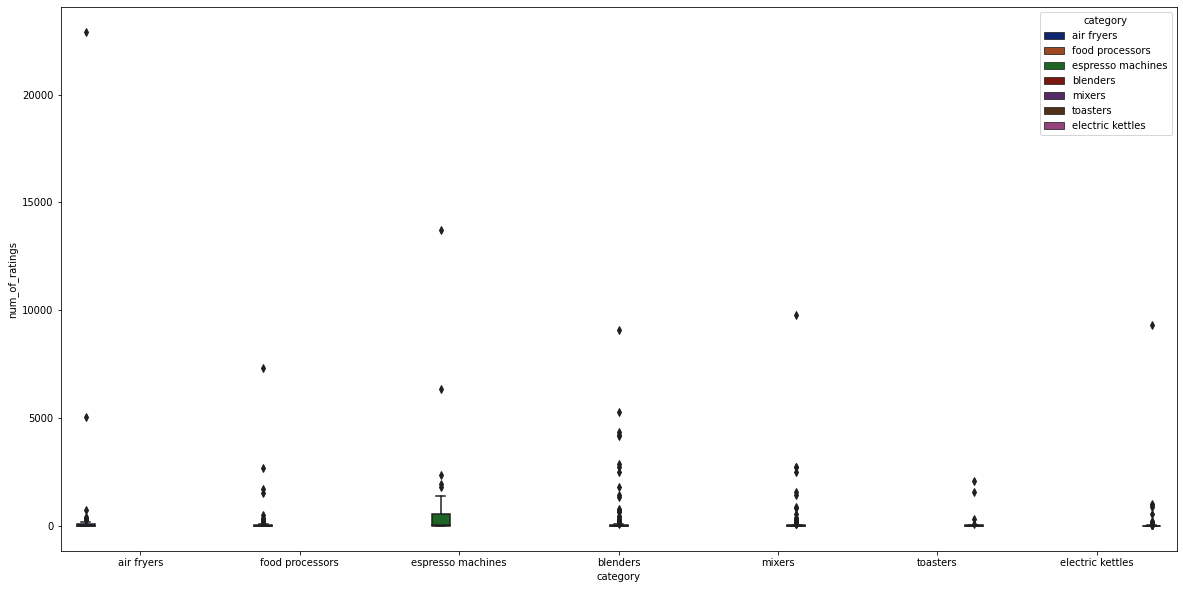

In [5]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df, x="category", y="num_of_ratings", hue="category", palette="dark")

the outliers show the products with the most number of ratings which reflects the most number of sales.

In [6]:
class Quantile:
    def __init__(self, q):
        self.q = q
        
    def __call__(self, x):
        return x.quantile(self.q)
        # Or using numpy
        # return np.quantile(x.dropna(), self.q)

In [7]:
df.groupby(['category']).agg(mean_num_of_ratings=('num_of_ratings','mean'), median_num_of_ratings=('num_of_ratings','median'), quantile_75=('num_of_ratings',Quantile(0.75)), quantile_95=('num_of_ratings',Quantile(0.95)))

,mean_num_of_ratings,median_num_of_ratings,quantile_75,quantile_95
category,,,,
air fryers,511.609375,17.0,104.00,407.80
blenders,274.482955,4.0,42.00,1534.75
electric kettles,130.845455,2.0,14.25,198.15
espresso machines,946.352941,42.0,563.50,3748.15
food processors,257.269841,4.0,57.00,1432.00
mixers,240.801802,6.0,32.00,1150.00
toasters,180.416667,9.5,38.75,1373.50


In [8]:
df_top_products=df.loc[(df['num_of_ratings'] >= 407.80) & (df['category'] == 'air fryers')]
df_top_products

,title,brand,category,price,date,rating,num_of_ratings,link
2,"NutriCook, Smart Air Fryer Oven, 1800W, 12L, B...",nutricook,air fryers,8750.0,2023-01-09,4.3,415,https://www.amazon.eg/-/en/NutriCook-Smart-Fry...
14,Delonghi Chef Plus FH 1396/1 MultiCooker EXTRA...,DeLonghi,air fryers,10799.0,2023-01-09,4.4,726,https://www.amazon.eg/-/en/Delonghi-MultiCooke...
28,"Philips Essential Air Fryer XL 1.2KG, 6.2L Cap...",PHILIPS,air fryers,7760.0,2023-01-09,4.6,5050,https://www.amazon.eg/-/en/Philips-Essential-C...
50,"Ninja Foodi 5-in-1 Indoor Grill with Air Fry, ...",Ninja,air fryers,12500.0,2023-01-09,4.8,22903,https://www.amazon.eg/-/en/Ninja-Foodi-Indoor-...


In [9]:
df_top_products=df_top_products.append([df.loc[(df['num_of_ratings'] >= 1534.75) & (df['category'] == 'blenders')], 
df.loc[(df['num_of_ratings'] >= 198.15) & (df['category'] == 'electric kettles')],
df.loc[(df['num_of_ratings'] >= 3748.15) & (df['category'] == 'espresso machines')],
df.loc[(df['num_of_ratings'] >= 1432.00) & (df['category'] == 'food processors')],
df.loc[(df['num_of_ratings'] >= 1150.00) & (df['category'] == 'mixers')],
df.loc[(df['num_of_ratings'] >= 1373.50) & (df['category'] == 'toasters')]], ignore_index=True)

In [10]:
df_top_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           33 non-null     object 
 1   brand           33 non-null     object 
 2   category        33 non-null     object 
 3   price           33 non-null     float64
 4   date            33 non-null     object 
 5   rating          33 non-null     float64
 6   num_of_ratings  33 non-null     int64  
 7   link            33 non-null     object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.2+ KB


there're 33 products that has a number of ratings more than the other 95% products in their category.

In [11]:
df_top_products

,title,brand,category,price,date,rating,num_of_ratings,link
0,"NutriCook, Smart Air Fryer Oven, 1800W, 12L, B...",nutricook,air fryers,8750.0,2023-01-09,4.3,415,https://www.amazon.eg/-/en/NutriCook-Smart-Fry...
1,Delonghi Chef Plus FH 1396/1 MultiCooker EXTRA...,DeLonghi,air fryers,10799.0,2023-01-09,4.4,726,https://www.amazon.eg/-/en/Delonghi-MultiCooke...
2,"Philips Essential Air Fryer XL 1.2KG, 6.2L Cap...",PHILIPS,air fryers,7760.0,2023-01-09,4.6,5050,https://www.amazon.eg/-/en/Philips-Essential-C...
3,"Ninja Foodi 5-in-1 Indoor Grill with Air Fry, ...",Ninja,air fryers,12500.0,2023-01-09,4.8,22903,https://www.amazon.eg/-/en/Ninja-Foodi-Indoor-...
4,Braun 0.6 Litre Multi Quick 5V Hand Blender wi...,Braun,blenders,2599.0,2023-01-09,4.7,4346,https://www.amazon.eg/-/en/Braun-Technology-MQ...
5,"Braun Countertop Blenders , 60 Watt , 1.8 kg -...",Braun,blenders,1348.0,2023-01-09,4.6,4175,https://www.amazon.eg/-/en/Braun-Countertop-Bl...
6,Bosch MSM66155 Hand blender ErgoMixx 600 Watts...,Bosch,blenders,1899.0,2023-01-09,4.6,2528,https://www.amazon.eg/Bosch-MSM66155-blender-E...
7,Braun Mq100 Multiquick 1 Tribute Collection Ha...,Braun,blenders,1199.0,2023-01-09,4.6,9096,https://www.amazon.eg/-/en/Braun-Multiquick-Co...
8,"Braun Multiquick 7 Hand Blender 750 Watts, Bla...",Braun,blenders,3048.0,2023-01-09,4.5,2872,https://www.amazon.eg/-/en/Braun-Multiquick-Bl...
9,Braun Multiquick 5 Vario Hand Blender MQ 5035 ...,Braun,blenders,3400.0,2023-01-09,4.7,5267,https://www.amazon.eg/-/en/Braun-Multiquick-Va...


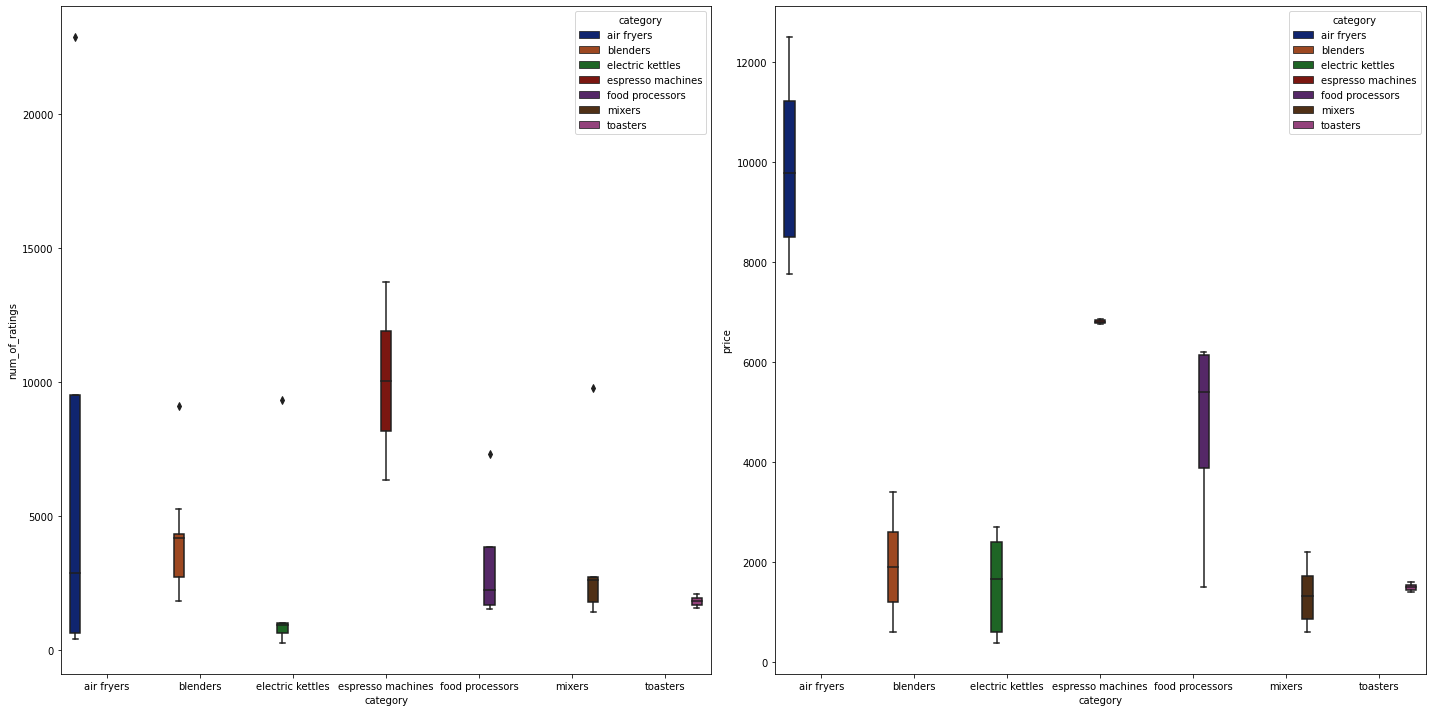

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
sns.boxplot(data=df_top_products, x="category", y="num_of_ratings", hue="category", palette="dark", ax=axes[0])
sns.boxplot(data=df_top_products, x="category", y="price", hue="category", palette="dark", ax=axes[1])
fig.tight_layout()

- we can see that the air fryers market has the highest prices among all the categories as it varies between around 8000 and 12000 EGP.
- the espresso machines market comes in the second place with a little variety and the prices are around 7000 EGP.
- after that the other markets are close to each other around 1000 and 3500 EGP prices except for the food processors with a range between 6000 and 2000 EGP. 

In [13]:
df_top_products.link[1]

'https://www.amazon.eg/-/en/Delonghi-MultiCooker-Liters-international-Warranty/dp/B015QFJ4IC/ref=sr_1_15?qid=1673219321&refinements=p_72%3A21909187031&rnid=21863949031&s=home-garden&sr=1-15'

In [14]:
top_products=list(df_top_products.link)
len(top_products)

33

we scrape the description for each product in our list so that we can know more about each one of them.

In [15]:
""" filename='amazonTopProducts.csv'
header=['link','description'] """

" filename='amazonTopProducts.csv'\nheader=['link','description'] "

In [16]:
""" with open(filename,'w',newline='',encoding='UTF8') as f:
    writer=csv.writer(f)
    writer.writerow(header) """

" with open(filename,'w',newline='',encoding='UTF8') as f:\n    writer=csv.writer(f)\n    writer.writerow(header) "

In [17]:
""" def append_top(link):
    link=top_products[i]
    headers= {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.74 Safari/537.36"}
    page=requests.get(link,headers=headers,cookies={'lc-acbeg':'en_AE'},timeout=30,verify=False)
    soup1= BeautifulSoup(page.content,'html.parser')
    soup2=BeautifulSoup(soup1.prettify(),'html.parser')
    description = soup2.find(id='productDescription_feature_div')
    data=[link,description]
    with open(filename,'a+',newline='',encoding='UTF8') as f:
        writer=csv.writer(f)
        writer.writerow(data) """

' def append_top(link):\n    link=top_products[i]\n    headers= {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.74 Safari/537.36"}\n    page=requests.get(link,headers=headers,cookies={\'lc-acbeg\':\'en_AE\'},timeout=30,verify=False)\n    soup1= BeautifulSoup(page.content,\'html.parser\')\n    soup2=BeautifulSoup(soup1.prettify(),\'html.parser\')\n    description = soup2.find(id=\'productDescription_feature_div\')\n    data=[link,description]\n    with open(filename,\'a+\',newline=\'\',encoding=\'UTF8\') as f:\n        writer=csv.writer(f)\n        writer.writerow(data) '

In [18]:
""" for i in range(0,33):
    append_top(top_products)
    i+=1 """

' for i in range(0,33):\n    append_top(top_products)\n    i+=1 '

In [19]:
df_top_products_description=pd.read_csv('amazonTopProducts.csv')
df_top_products_description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   link         33 non-null     object
 1   description  33 non-null     object
dtypes: object(2)
memory usage: 656.0+ bytes


In [20]:
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result
df_top_products_description['description']=df_top_products_description['description'].apply(lambda cw : remove_tags(cw))
df_top_products_description.head()

,link,description
0,https://www.amazon.eg/-/en/NutriCook-Smart-Fry...,\n\n\n\n\n\n\n\n Product description\...
1,https://www.amazon.eg/-/en/Delonghi-MultiCooke...,\n\n\n\n\n\n\n\n Product description\...
2,https://www.amazon.eg/-/en/Philips-Essential-C...,\n\n\n\n\n\n\n\n Product description\...
3,https://www.amazon.eg/-/en/Ninja-Foodi-Indoor-...,\n\n\n\n\n\n\n\n Product description\...
4,https://www.amazon.eg/-/en/Braun-Technology-MQ...,\n\n\n\n\n\n\n\n Product description\...


In [21]:
df_top_products_description['description'] = df_top_products_description['description'].str.replace('\n', '', regex=True).str.strip()
df_top_products_description.head()

,link,description
0,https://www.amazon.eg/-/en/NutriCook-Smart-Fry...,Product description Smart...
1,https://www.amazon.eg/-/en/Delonghi-MultiCooke...,Product description Del...
2,https://www.amazon.eg/-/en/Philips-Essential-C...,Product description Philip...
3,https://www.amazon.eg/-/en/Ninja-Foodi-Indoor-...,Product description Compac...
4,https://www.amazon.eg/-/en/Braun-Technology-MQ...,Product description Braun ...


In [22]:
df_top_products_description['description'] = df_top_products_description['description'].apply(lambda st: st[st.find("Product "):st.find("#productDescription")])
df_top_products_description.head()

,link,description
0,https://www.amazon.eg/-/en/NutriCook-Smart-Fry...,Product description Smart...
1,https://www.amazon.eg/-/en/Delonghi-MultiCooke...,Product description Del...
2,https://www.amazon.eg/-/en/Philips-Essential-C...,Product description Philip...
3,https://www.amazon.eg/-/en/Ninja-Foodi-Indoor-...,Product description Compac...
4,https://www.amazon.eg/-/en/Braun-Technology-MQ...,Product description Braun ...


In [23]:
df_top_products_description.link[32]

'https://www.amazon.eg/Taurus-Toast-Duplo-Toaster-1450/dp/B074K8BJ9D/ref=sr_1_18?qid=1673224752&refinements=p_72%3A21909187031&rnid=21863827031&s=home-garden&sr=1-18'

In [24]:
df_top_products_description.description[32]

'Product description                        Brand: Taurus                             Model Name: My toast Duplo                             Color: White                             Item Weight: 1.9 Kg                             Product Dimensions: 40 x 15.5 x 19.5 cm                             Power: 1450 watts                             Voltage: 240 V                             Energy Efficiency Class: A                             Size of Slots: length 262mm / Wide 32mm                             Crumb tray and Cord holder                        '

In [25]:
""" df_top_products.to_sql('amazonTopProducts', cnn, index=False)
df_top_products_description.to_sql('amazonTopProductsDescription', cnn, index=False) """

" df_top_products.to_sql('amazonTopProducts', cnn, index=False)\ndf_top_products_description.to_sql('amazonTopProductsDescription', cnn, index=False) "

In [26]:
df_top_products=pd.read_sql('''SELECT t.title, t.brand, t.category, t.price, t.date, t.rating, t.num_of_ratings, t.link, d.description
 FROM amazonTopProducts t
 JOIN amazonTopProductsDescription d
 on t.link=d.link
 ''', con=cnn)
df_top_products

,title,brand,category,price,date,rating,num_of_ratings,link,description
0,"NutriCook, Smart Air Fryer Oven, 1800W, 12L, B...",nutricook,air fryers,8750.0,2023-01-09,4.3,415,https://www.amazon.eg/-/en/NutriCook-Smart-Fry...,Product description Smart...
1,Delonghi Chef Plus FH 1396/1 MultiCooker EXTRA...,DeLonghi,air fryers,10799.0,2023-01-09,4.4,726,https://www.amazon.eg/-/en/Delonghi-MultiCooke...,Product description Del...
2,"Philips Essential Air Fryer XL 1.2KG, 6.2L Cap...",PHILIPS,air fryers,7760.0,2023-01-09,4.6,5050,https://www.amazon.eg/-/en/Philips-Essential-C...,Product description Philip...
3,"Ninja Foodi 5-in-1 Indoor Grill with Air Fry, ...",Ninja,air fryers,12500.0,2023-01-09,4.8,22903,https://www.amazon.eg/-/en/Ninja-Foodi-Indoor-...,Product description Compac...
4,Braun 0.6 Litre Multi Quick 5V Hand Blender wi...,Braun,blenders,2599.0,2023-01-09,4.7,4346,https://www.amazon.eg/-/en/Braun-Technology-MQ...,Product description Braun ...
5,"Braun Countertop Blenders , 60 Watt , 1.8 kg -...",Braun,blenders,1348.0,2023-01-09,4.6,4175,https://www.amazon.eg/-/en/Braun-Countertop-Bl...,Product description Tribut...
6,Bosch MSM66155 Hand blender ErgoMixx 600 Watts...,Bosch,blenders,1899.0,2023-01-09,4.6,2528,https://www.amazon.eg/Bosch-MSM66155-blender-E...,Product description Ext...
7,Braun Mq100 Multiquick 1 Tribute Collection Ha...,Braun,blenders,1199.0,2023-01-09,4.6,9096,https://www.amazon.eg/-/en/Braun-Multiquick-Co...,Product description The B...
8,"Braun Multiquick 7 Hand Blender 750 Watts, Bla...",Braun,blenders,3048.0,2023-01-09,4.5,2872,https://www.amazon.eg/-/en/Braun-Multiquick-Bl...,Product description Bring...
9,Braun Multiquick 5 Vario Hand Blender MQ 5035 ...,Braun,blenders,3400.0,2023-01-09,4.7,5267,https://www.amazon.eg/-/en/Braun-Multiquick-Va...,Product description Choos...


In [27]:
""" df_top_products.to_sql('amazonFinalTopProducts', cnn, index=False)
df_top_products.to_csv('amazonFinalTopProducts.csv', index=False) """

" df_top_products.to_sql('amazonFinalTopProducts', cnn, index=False)\ndf_top_products.to_csv('amazonFinalTopProducts.csv', index=False) "

In [28]:
df_top_products=pd.read_csv('amazonFinalTopProducts.csv')
df_top_products

,title,brand,category,price,date,rating,num_of_ratings,link,description
0,"NutriCook, Smart Air Fryer Oven, 1800W, 12L, B...",nutricook,air fryers,8750.0,2023-01-09,4.3,415,https://www.amazon.eg/-/en/NutriCook-Smart-Fry...,Product description Smart...
1,Delonghi Chef Plus FH 1396/1 MultiCooker EXTRA...,DeLonghi,air fryers,10799.0,2023-01-09,4.4,726,https://www.amazon.eg/-/en/Delonghi-MultiCooke...,Product description Del...
2,"Philips Essential Air Fryer XL 1.2KG, 6.2L Cap...",PHILIPS,air fryers,7760.0,2023-01-09,4.6,5050,https://www.amazon.eg/-/en/Philips-Essential-C...,Product description Philip...
3,"Ninja Foodi 5-in-1 Indoor Grill with Air Fry, ...",Ninja,air fryers,12500.0,2023-01-09,4.8,22903,https://www.amazon.eg/-/en/Ninja-Foodi-Indoor-...,Product description Compac...
4,Braun 0.6 Litre Multi Quick 5V Hand Blender wi...,Braun,blenders,2599.0,2023-01-09,4.7,4346,https://www.amazon.eg/-/en/Braun-Technology-MQ...,Product description Braun ...
5,"Braun Countertop Blenders , 60 Watt , 1.8 kg -...",Braun,blenders,1348.0,2023-01-09,4.6,4175,https://www.amazon.eg/-/en/Braun-Countertop-Bl...,Product description Tribut...
6,Bosch MSM66155 Hand blender ErgoMixx 600 Watts...,Bosch,blenders,1899.0,2023-01-09,4.6,2528,https://www.amazon.eg/Bosch-MSM66155-blender-E...,Product description Ext...
7,Braun Mq100 Multiquick 1 Tribute Collection Ha...,Braun,blenders,1199.0,2023-01-09,4.6,9096,https://www.amazon.eg/-/en/Braun-Multiquick-Co...,Product description The B...
8,"Braun Multiquick 7 Hand Blender 750 Watts, Bla...",Braun,blenders,3048.0,2023-01-09,4.5,2872,https://www.amazon.eg/-/en/Braun-Multiquick-Bl...,Product description Bring...
9,Braun Multiquick 5 Vario Hand Blender MQ 5035 ...,Braun,blenders,3400.0,2023-01-09,4.7,5267,https://www.amazon.eg/-/en/Braun-Multiquick-Va...,Product description Choos...


Finally we have a dataset ready for the best products with their description that we can study to get an idea of what an ideal product is.

# conclusions

- the project used beautifulsoup to scrape the amazon website in egypt for 7 categories in the kitchen appliances market.
- after the scraping we used SQL and pandas to clean the dataset and get ready for the analysis.
- the analysis was performed using seaborn, pandas as SQL to answer the business questions and the results are:
    - We concluded that Black & Decker appeared in 3 categories as a main competetor with a variety of products so we should consider them.
    - Braun also appeared in more than one category, Philips has 17 air fryers so it has many products in the air fryers market.
    - in some categories it seems like there's a brand that has a great number of products and has great number of ratings with a great difference than the next compitetors such as: Bosch in the mixers market, Delonghi in the espresso machines, and braun in the blenders market.
    -  Ninja and hario had one product that got them in the list for the top compitetors in the air fryers and electric kettles markets so we should study these products carefully.
    - We can see that the air fryers market has the highest prices among all the categories as it varies between around 8000 and 12000 EGP.
    - the espresso machines market comes in the second place with a little variety and the prices are around 7000 EGP.
    - after that the other markets are close to each other around 1000 and 3500 EGP prices except for the food processors with a range between 6000 and 2000 EGP.
    - the top products were saved in a seperate file with their discription and we can track their performance overtime with append_product function to track the ratings and the price.